In [1]:
import requests
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

### Л1.1 Побудуйте гiстограму частот появи лiтер в текстi.

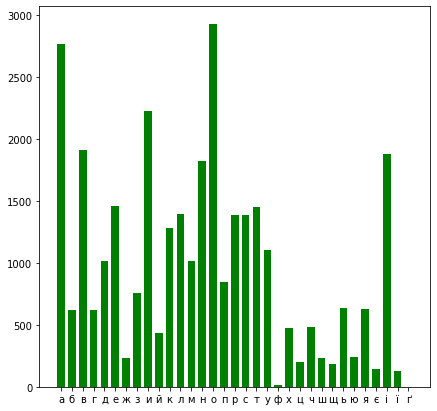

In [2]:
link = "https://raw.githubusercontent.com/alina-belaya/MathCrypto/main/Lab1/Lab1Text.txt"
req = requests.get(link).text.lower()

text = re.sub('[^а-яєіїюґ]', '', req)

c = Counter(text)
plt.figure(figsize=(7, 7))
plt.bar(*zip(*sorted(c.most_common())), width=.7, color='g')
plt.show()

### Л1.2 Реалiзуйте алгоритм шифрування Вiженера.

In [3]:
def generate_key(txt, kw):
  if len(txt) == len(kw):
    return kw
  key = []
  for i in range(len(txt)):
    key.append(kw[i % len(kw)])
  return "".join(key)


def vigenere_encryption(pt, k):
    txt = re.sub('[^а-яєіїюґ]', '', pt.lower())
    ct = []
    sk = list(k)
    for number, letter in enumerate(txt):
        ct_letter = (alphabet.index(letter) + alphabet.index(sk[number])) % 33
        ct.append(alphabet[ct_letter])
    return "".join(ct)


def vigenere_decryprion(ct, k):
  pt = []
  sk = list(k)
  for number, letter in enumerate(ct):
    pt_letter = (alphabet.index(letter) - alphabet.index(sk[number])) % 33
    pt.append(alphabet[pt_letter])
  return "".join(pt)


In [4]:
alphabet = ['а', 'б', 'в', 'г', 'ґ', 'д', 'е', 'є', 'ж', 'з', 'и', 'і', 'ї', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я']

txt_input = "криптографія"
plain_text = "".join(e for e in txt_input.lower() if e.isalpha())

keyword = "ключслово"
key = generate_key(plain_text, keyword)

cipher_text = vigenere_encryption(plain_text, key)

print("Plain text: {}\nKey: {}\nCipher text: {}".format(txt_input, keyword, cipher_text))
print("Decrypted text:", vigenere_decryprion(cipher_text, generate_key(cipher_text, keyword)))

Plain text: криптографія
Key: ключслово
Cipher text: швжйиастодць
Decrypted text: криптографія


###Л1.3 Проведiть криптоаналiз шифру Вiженера i розшифруйте запропонований криптотекст, не знаючи секретного ключа.

In [5]:
def countIoC(txt):
    letterCounts = Counter(txt)

    F = 0
    for letter in letterCounts:
        F += letterCounts[letter] * (letterCounts[letter] - 1)

    N = len(txt)
    IoC = F / (N * (N - 1))
    return IoC

In [6]:
cipherText = vigenere_encryption(text, generate_key(text, "коцюбинський"))

ct_len = len(cipherText)

IoC_list = []

for period in range(5, 21):
    period_list = []
    for i in range(period):
        substring = ""
        for j in range(i, ct_len, period):
            substring += cipherText[j]
        period_list.append(substring)
    IoC_list.append([countIoC(i) for i in period_list])

IoC_average = [sum(i) / len(i) for i in IoC_list]
key_len = 5 + IoC_average.index(max(IoC_average))
print("Key length:", key_len)


Key length: 12


In [7]:
def CaesarCipher(txt, shift):
    decrypted_message = ""

    for c in txt:
        if c in alphabet:
            position = alphabet.index(c)
            new_position = (position - shift) % 33
            new_character = alphabet[new_position]
            decrypted_message += new_character
        else:
            decrypted_message += c
    return decrypted_message


def countChiSq(txt):
    letter_count = [0] * 33
    all_letters = 0
    expect_freq = [0.0834, 0.0153, 0.055, 0.0159, 0.0001, 0.0306, 0.0459, 0.0039, 0.0071, 0.021, 0.06, 0.0124, 0.0623,
                   0.0084, 0.04, 0.0393, 0.0302, 0.071,
                   0.0928, 0.0284, 0.0548, 0.0457, 0.0477, 0.0338, 0.0035, 0.0117, 0.0102, 0.0115, 0.0071, 0.0032,
                   0.0183,
                   0.007, 0.0216]
    for i in txt:
        letter_count[alphabet.index(i)] += 1
        all_letters += 1

    cs = 0
    for i in range(33):
        cs += ((letter_count[i] - all_letters*expect_freq[i])**2) / (all_letters*expect_freq[i])
    return cs

In [8]:
secret_key = ""
for i in range(key_len):
    substring = ""
    for j in range(i, ct_len, key_len):
        substring += cipherText[j]
    all_chisq = []
    for k in range(33):
        chisq = countChiSq(CaesarCipher(substring, k))
        all_chisq.append(chisq)

    s = alphabet[all_chisq.index(min(all_chisq))]
    secret_key += s
print("Key:", secret_key)

Key: коцюбинський


In [9]:
plainText = vigenere_decryprion(cipherText, generate_key(cipherText, secret_key))
print(plainText[:300])

іванбувдевятнадцятоюдитиноювгуцульськійродиніпалійчуківдвадцятоюіостанньоюбулаанничканезнатичитовічнийшумчеремошуіскаргигірськихпотоківщосповнялисамотнюхатунависокійкичерічисумчорнихсмерековихлісівлякавдитинутількиіванвсеплакавкричавпоночахпоганорісідививсянаненютакимглибокимстаречерозумнимзоромщома
